**Auswertung:**


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s320/20210610-1847/",
            "../checkpoints/s321/20210615-1524//",
            "../checkpoints/s322/20210610-1848/",
            "../checkpoints/s323/20210610-1848/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.
No Q-value list found for ../checkpoints/s320/20210610-1847/.
No Q-value list found for ../checkpoints/s322/20210610-1848/.
No Q-value list found for ../checkpoints/s323/20210610-1848/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                            baseline_rule-based   
ddqn_new                                               0   
lr                                                  0.01   
discount_factor                                      0.9   
batch_size                                           128   
lambda_rwd_mstpc                                     0.1   
lambda_rwd_energy                                  5e-06   
energy_cons_in_kWh                                     0   
reward_offset                                        0.0   
stp_reward_step_offset                               1.0   
clip_econs_at                                        0.0   
soften_instead_of_clipping                             0   
target_network_update_freq                             3   
epsilon_final_step                                   100   
episodes_count                                       100   
agent_init_gain                                      0.8   
use_layer_normalization                                0   
fewer_q_values                                         0   
agent_w_l2                                         1e-05   
network_storage_frequency                             10   
model                            Building_5ZoneAirCooled   
single_setpoint_agent_count                          all   
next_occ_horizont                                      0   
rulebased_setpoint_unoccu_delta                      7.0   

                                                                   s320  \
algorithm                                                          ddqn   
ddqn_new                                                              0   
lr                                                                 0.08   
discount_factor                                                     0.9   
batch_size                                                          256   
lambda_rwd_mstpc                                                   0.06   
lambda_rwd_energy                                                 0.008   
energy_cons_in_kWh                                                    1   
reward_offset                                                       0.3   
stp_reward_step_offset                                              0.0   
clip_econs_at                                                       0.0   
soften_instead_of_clipping                                            0   
target_network_update_freq                                            2   
epsilon_final_step                                                21600   
episodes_count                                                      160   
agent_init_gain                                                     0.7   
use_layer_normalization                                               1   
fewer_q_values                                                        1   
agent_w_l2                                                        1e-06   
network_storage_frequency                                           160   
model                            Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                one_but2not5   
next_occ_horizont                                                     2   
rulebased_setpoint_unoccu_delta                                     8.0   

                                                                   s321  \
algorithm                                                          ddqn   
ddqn_new                                                              1   
lr                                                                 0.08   
discount_factor                                                     0.9   
batch_size                                                          256   
lambda_rwd_mstpc                                                   0.06   
lambda_rwd_energy                                                 0.008   
energy_cons_in_kWh                                                    1   


In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001          s320  \
Number of training episodes                      1.0  12494.000000   
Runtime in s                                     0.0  58032.602422   
Runtime in h                                     0.0     16.120167   
Mean episode runtime in s                        0.0      4.644838   
Mean episode runtime during eval. episode in s   0.0      4.668114   
Mean episode runtime after eval. episode in s    NaN      4.561380   
Mean episode runtime in no eval. episode in s    NaN      4.644691   

                                                         s321          s322  \
Number of training episodes                      21600.000000  14380.000000   
Runtime in s                                    104984.961805  57928.562699   
Runtime in h                                        29.162489     16.091267   
Mean episode runtime in s                            4.860415      4.028412   
Mean episode runtime during eval. episode in s       4.898124      4.145473   
Mean episode runtime after eval. episode in s        4.739569      3.974654   
Mean episode runtime in no eval. episode in s        4.860178      4.027683   

                                                        s323  
Number of training episodes                     12594.000000  
Runtime in s                                    58000.199727  
Runtime in h                                       16.111167  
Mean episode runtime in s                           4.605383  
Mean episode runtime during eval. episode in s      4.646229  
Mean episode runtime after eval. episode in s       4.568891  
Mean episode runtime in no eval. episode in s       4.605129

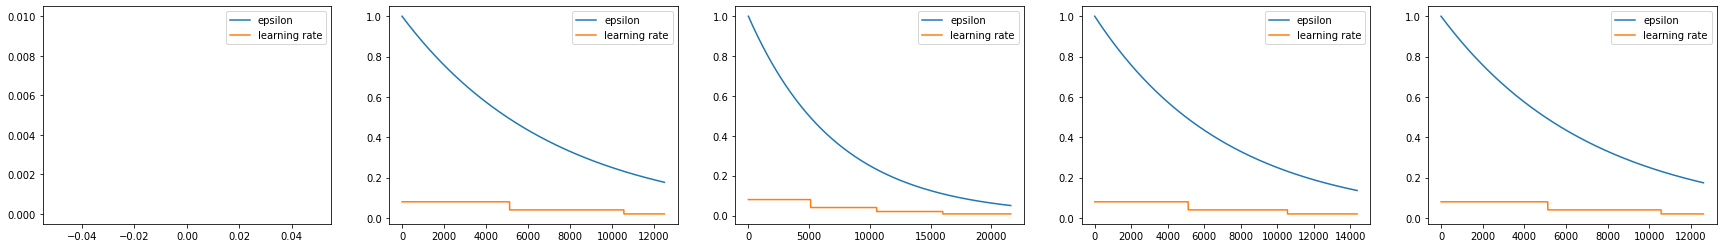

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

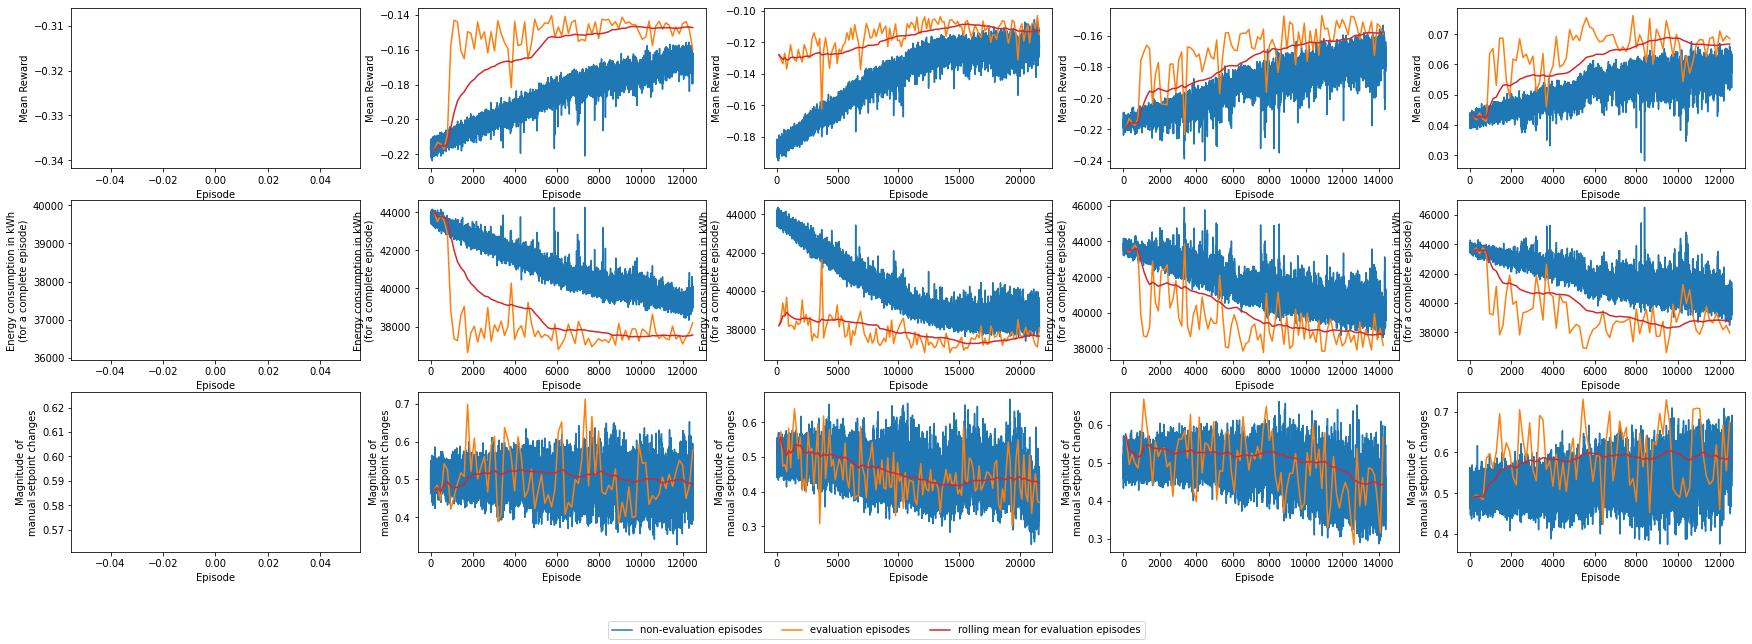

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

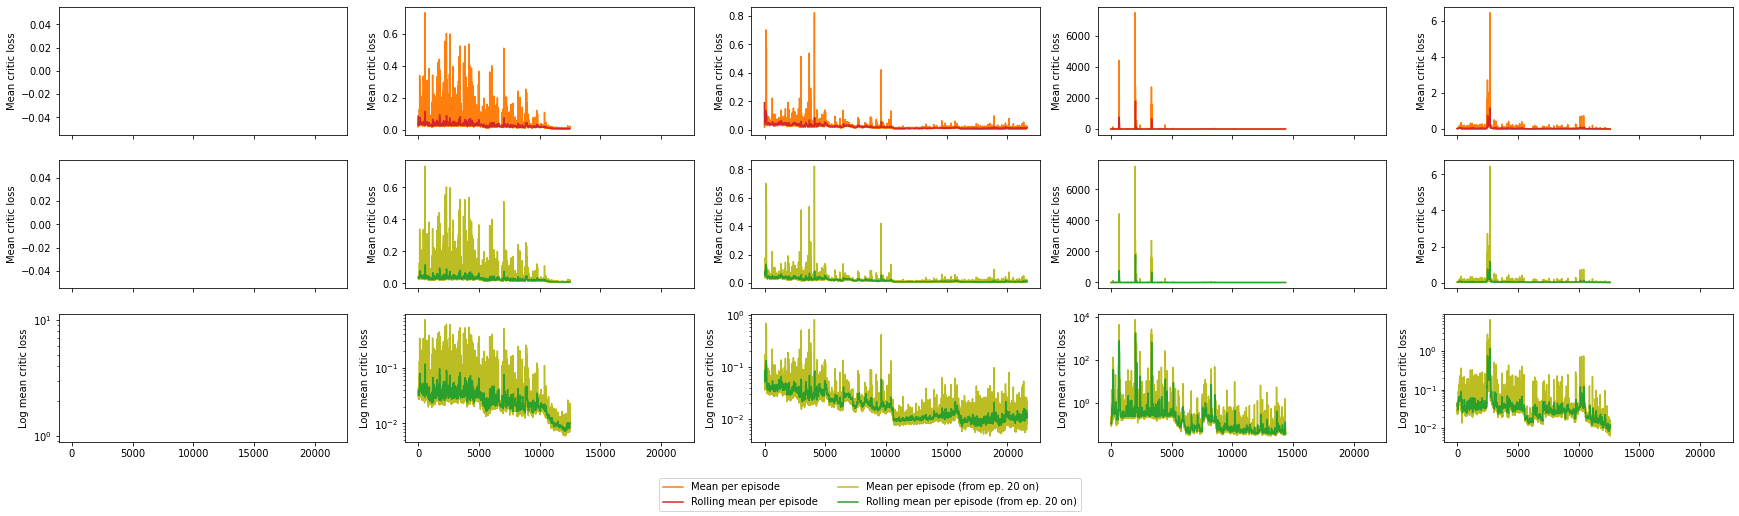

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

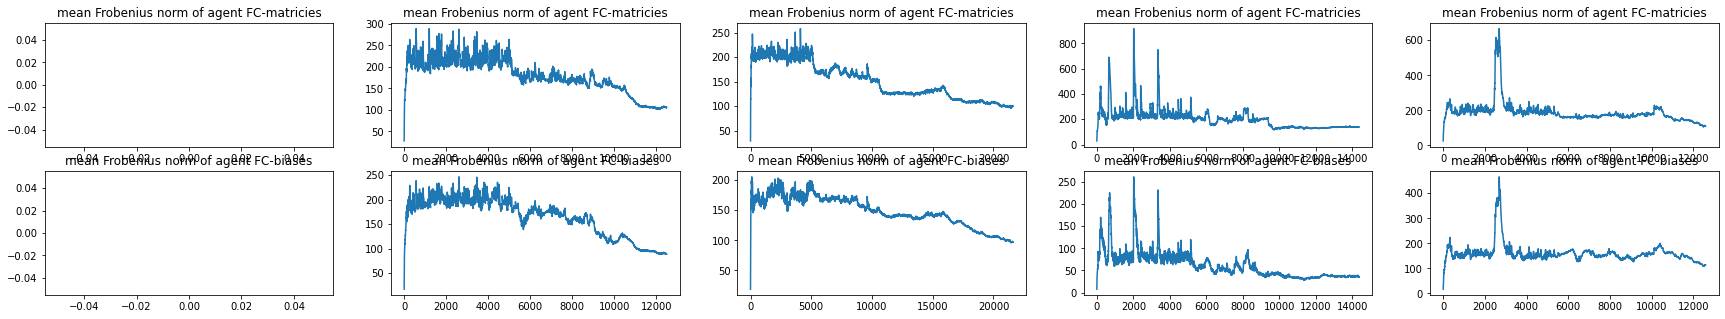

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  12479
Last available evaluation episode for dfs2:  21599
Last available evaluation episode for dfs3:  14239
Last available evaluation episode for dfs4:  12479


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 12479: Energy consumption:   38212.40 kWh; Sum of setpoint change magnitudes: 414.96331550069596
For episode 21599: Energy consumption:   38076.23 kWh; Sum of setpoint change magnitudes: 265.1242201176245
For episode 14239: Energy consumption:   38175.03 kWh; Sum of setpoint change magnitudes: 409.13386533895437
For episode 12479: Energy consumption:   37945.03 kWh; Sum of setpoint change magnitudes: 487.1778306213514

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 12479: Reward: -0.15980 kWh; Setpoint change magnit.:  0.57714; Energy cons.: 53146.58857
... 21599: Reward: -0.11519 kWh; Setpoint change magnit.:  0.36874; Energy cons.: 52957.19831
... 14239: Reward: -0.15890 kWh; Setpoint change magnit.:  0.56903; Energy cons.: 53094.61475
... 12479:

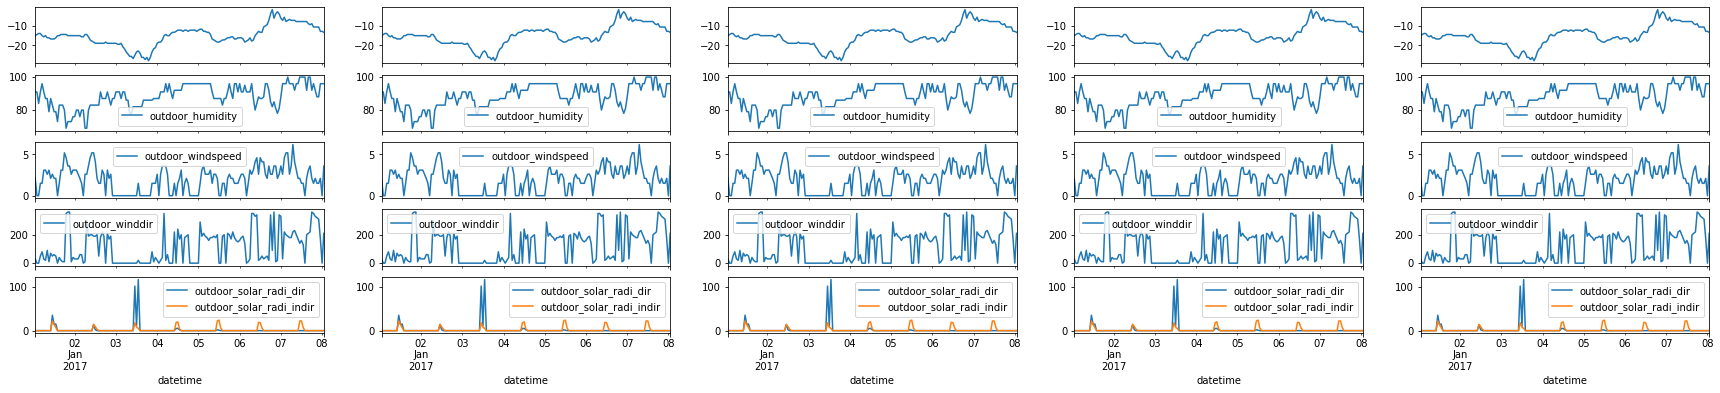

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

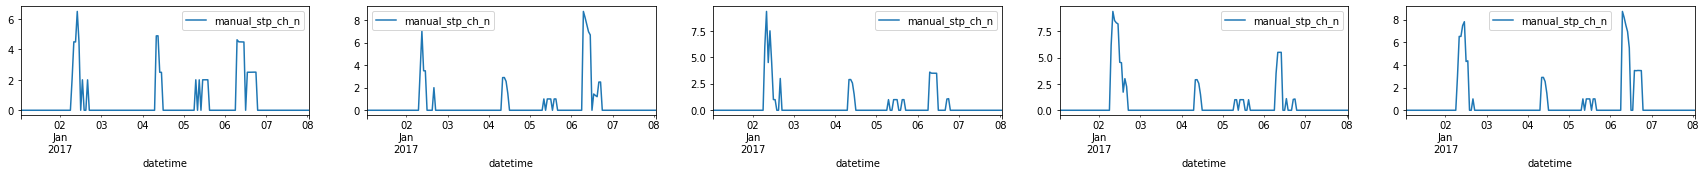

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

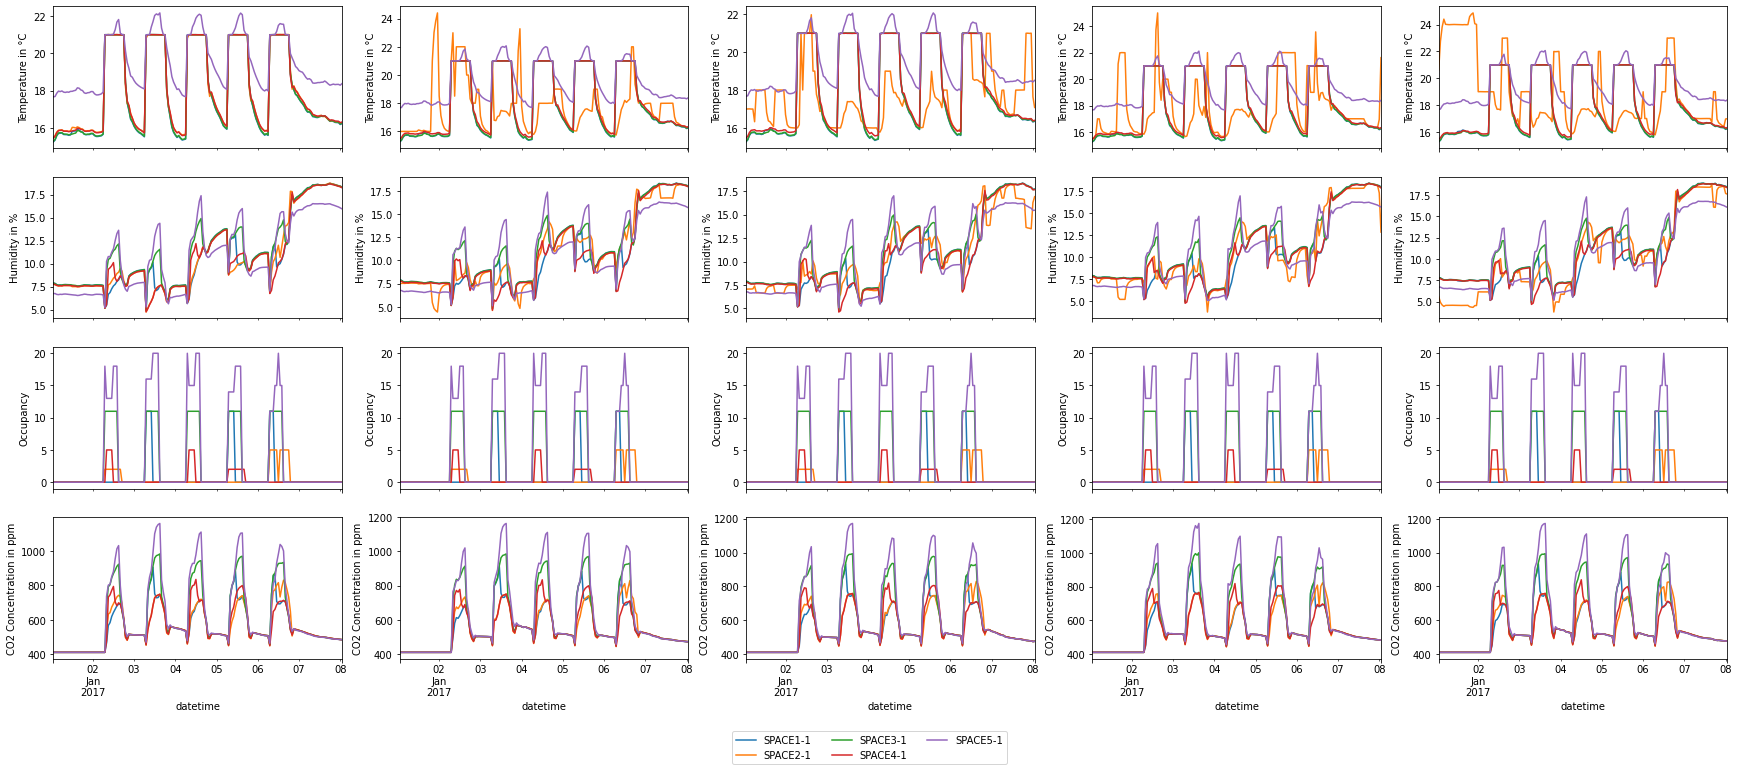

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3

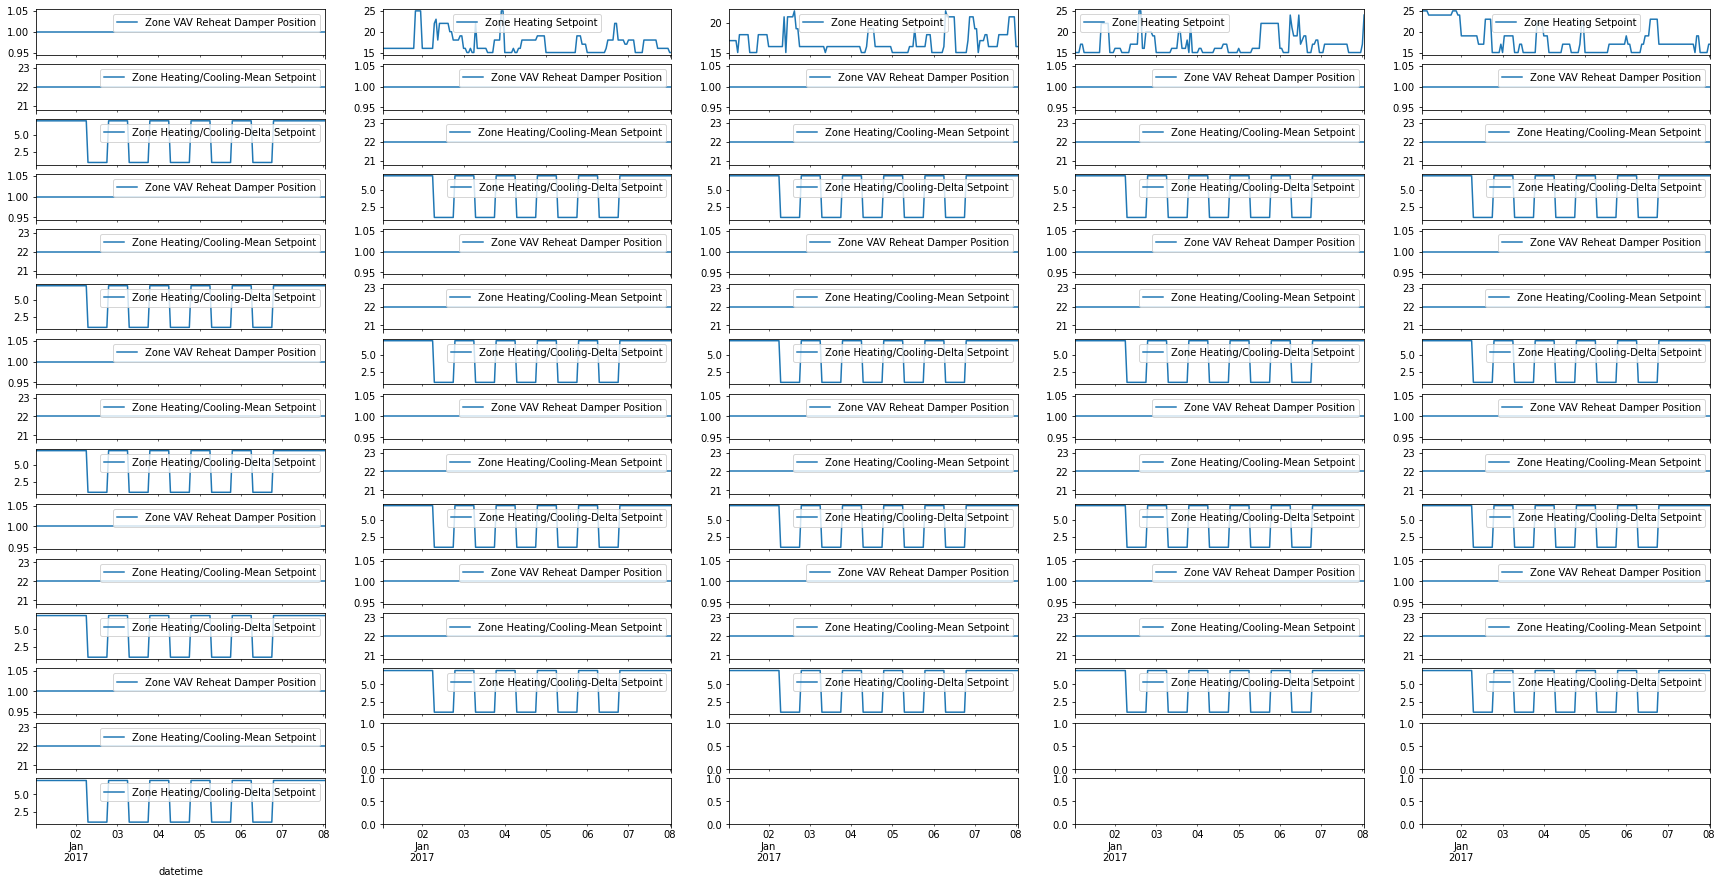

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

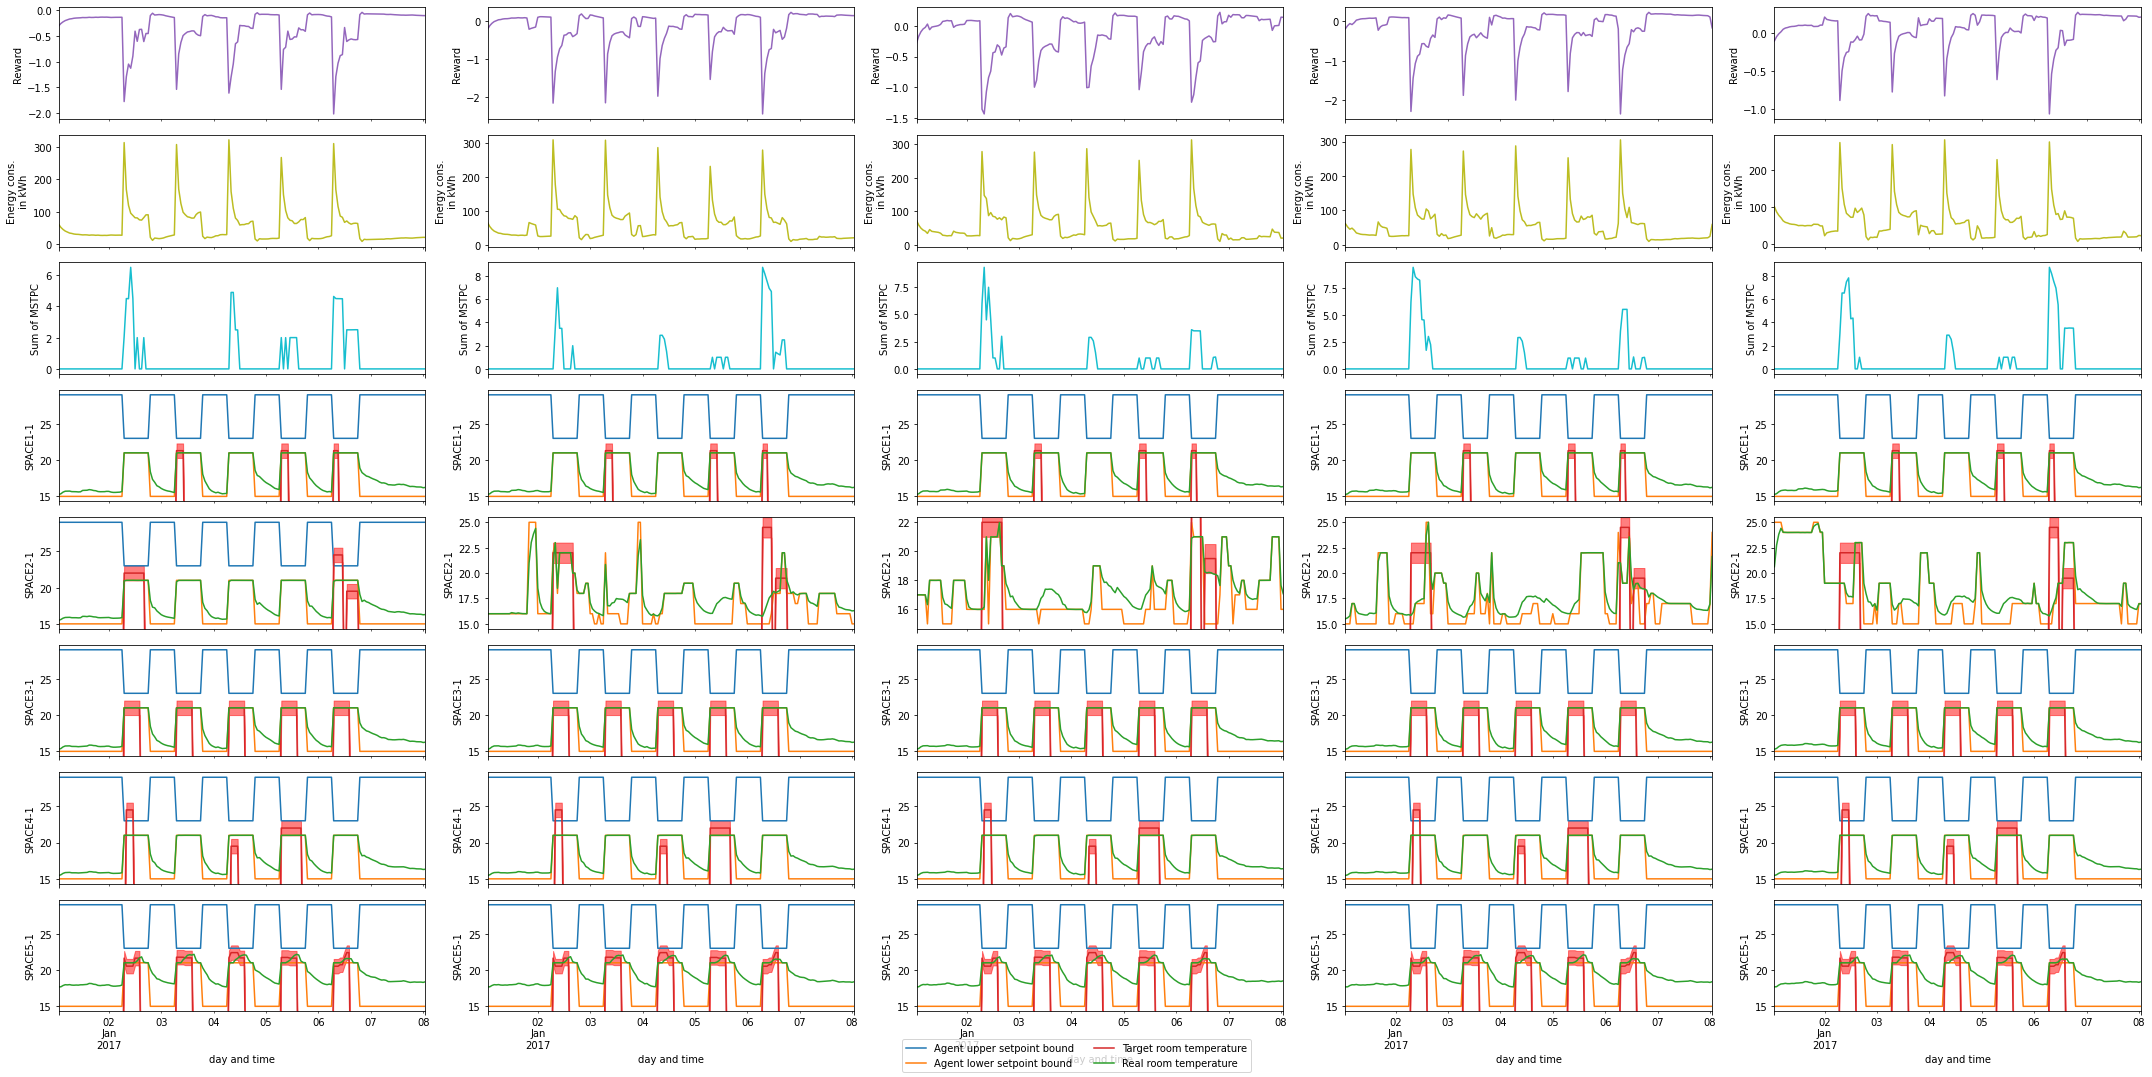

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

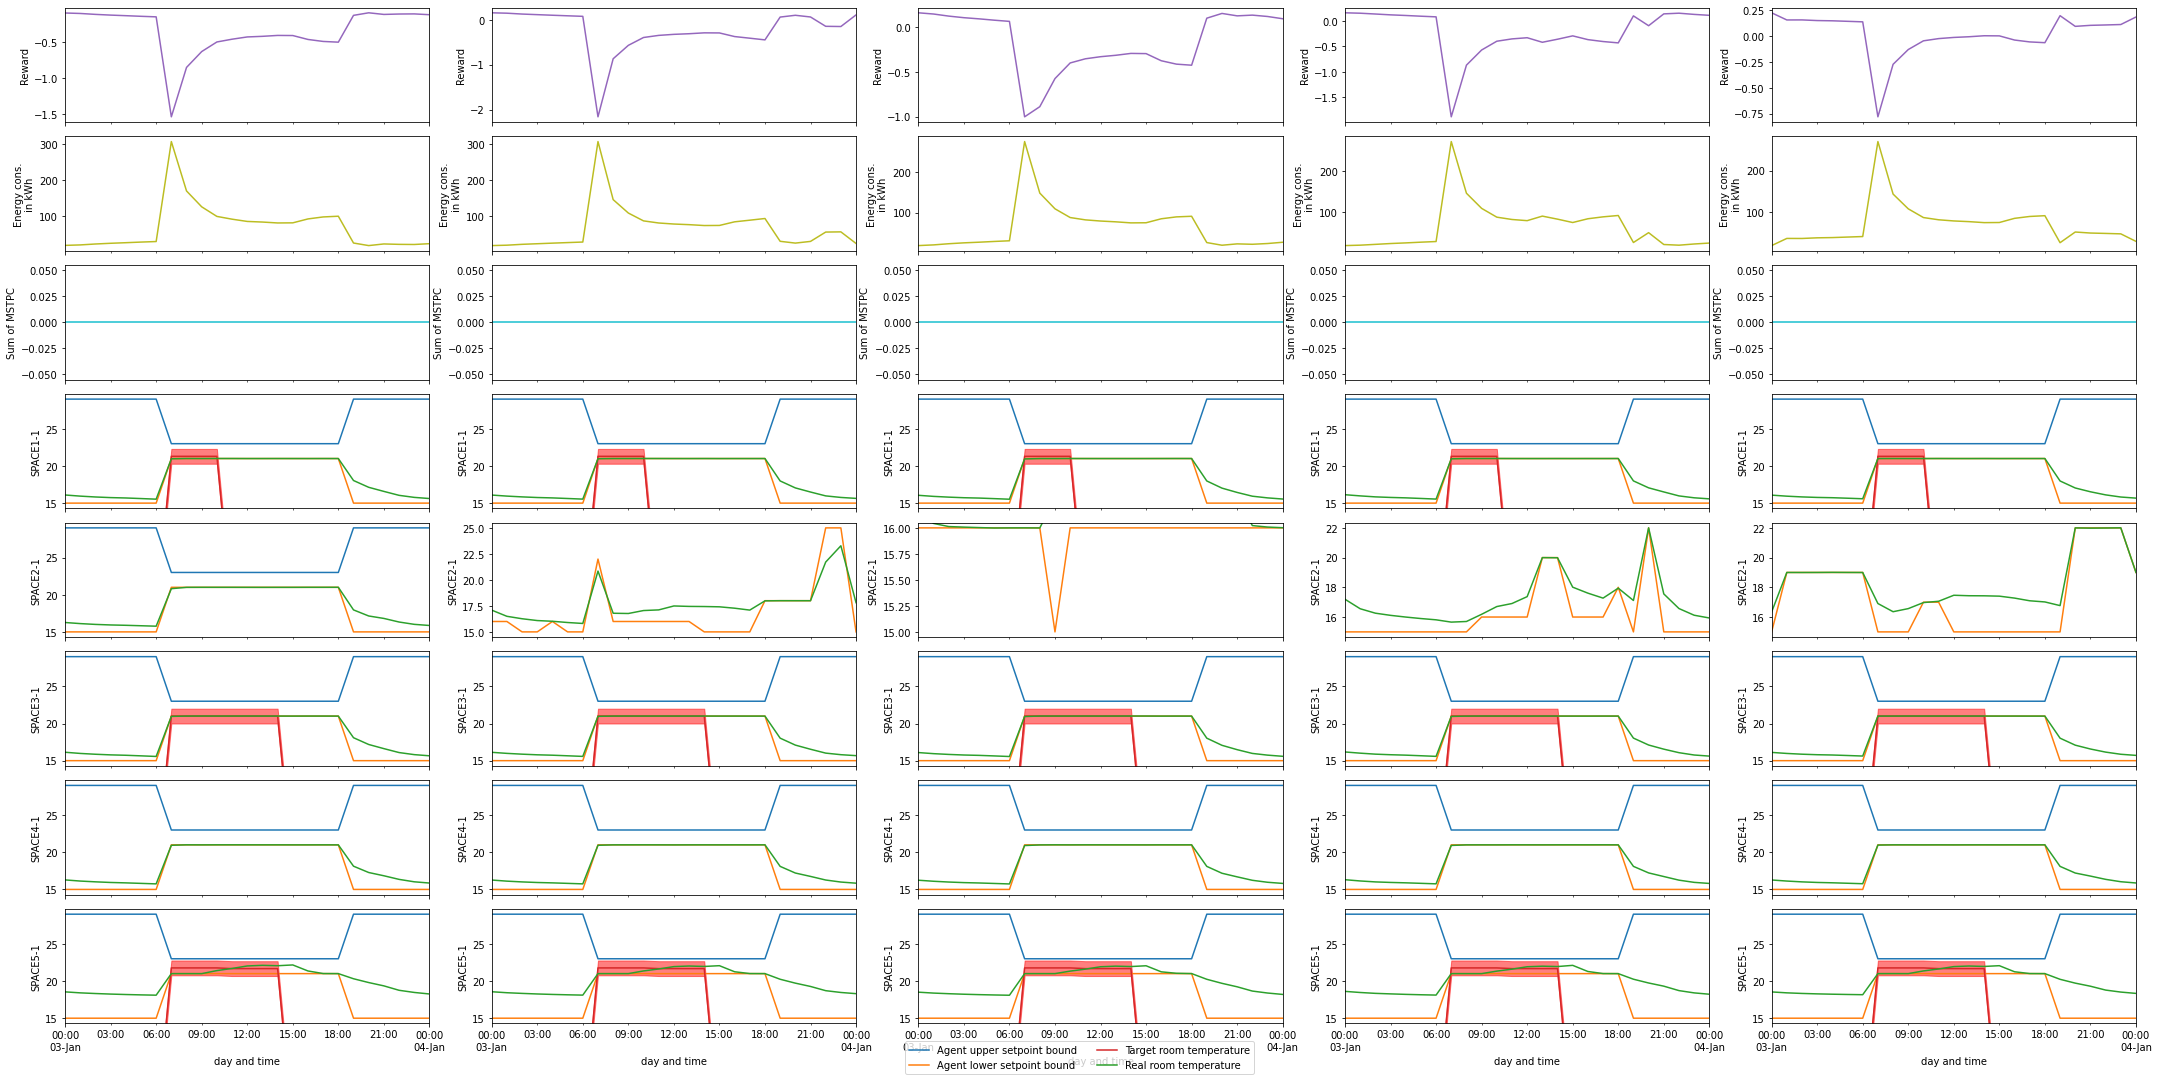

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  52171.4 Wh, mean reward = -0.1507
For plot number 3, mean energy consumption =  51946.6 Wh, mean reward = -0.1084
For plot number 4, mean energy consumption =  52291.5 Wh, mean reward = -0.1489
For plot number 5, mean energy consumption =  51673.1 Wh, mean reward =  0.0739


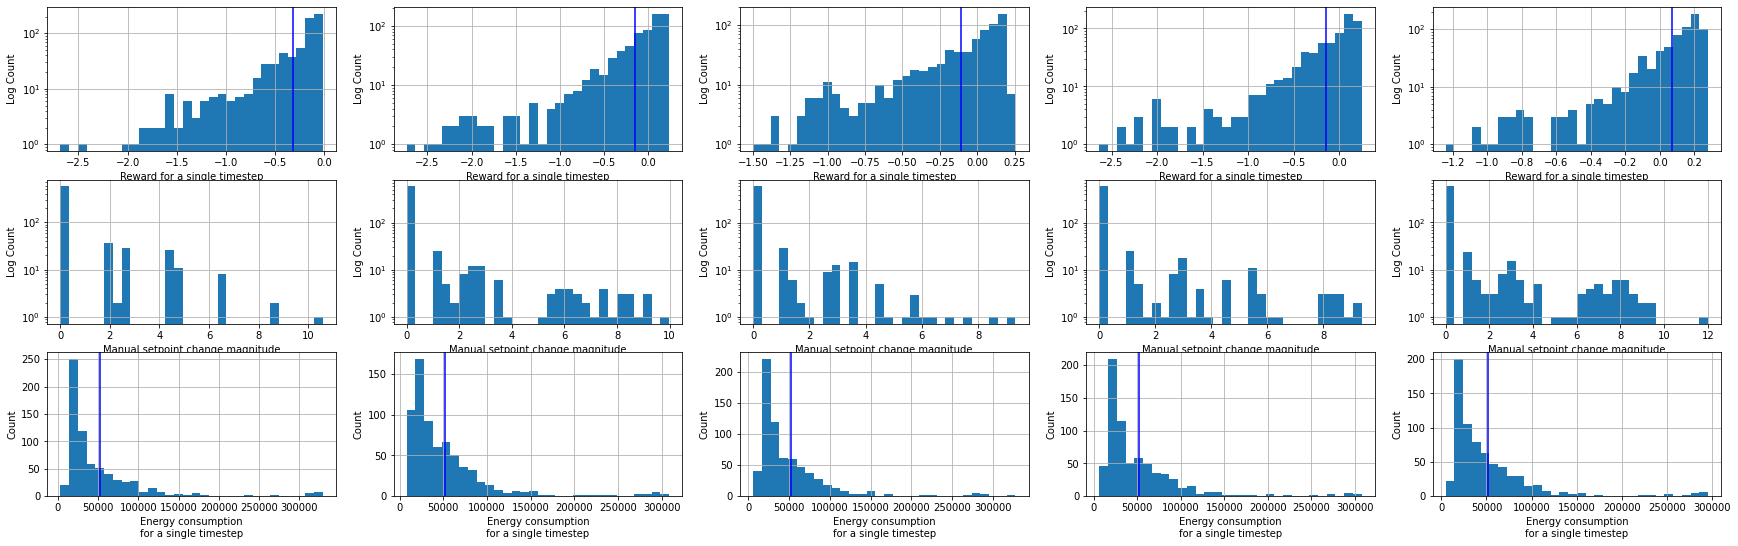

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

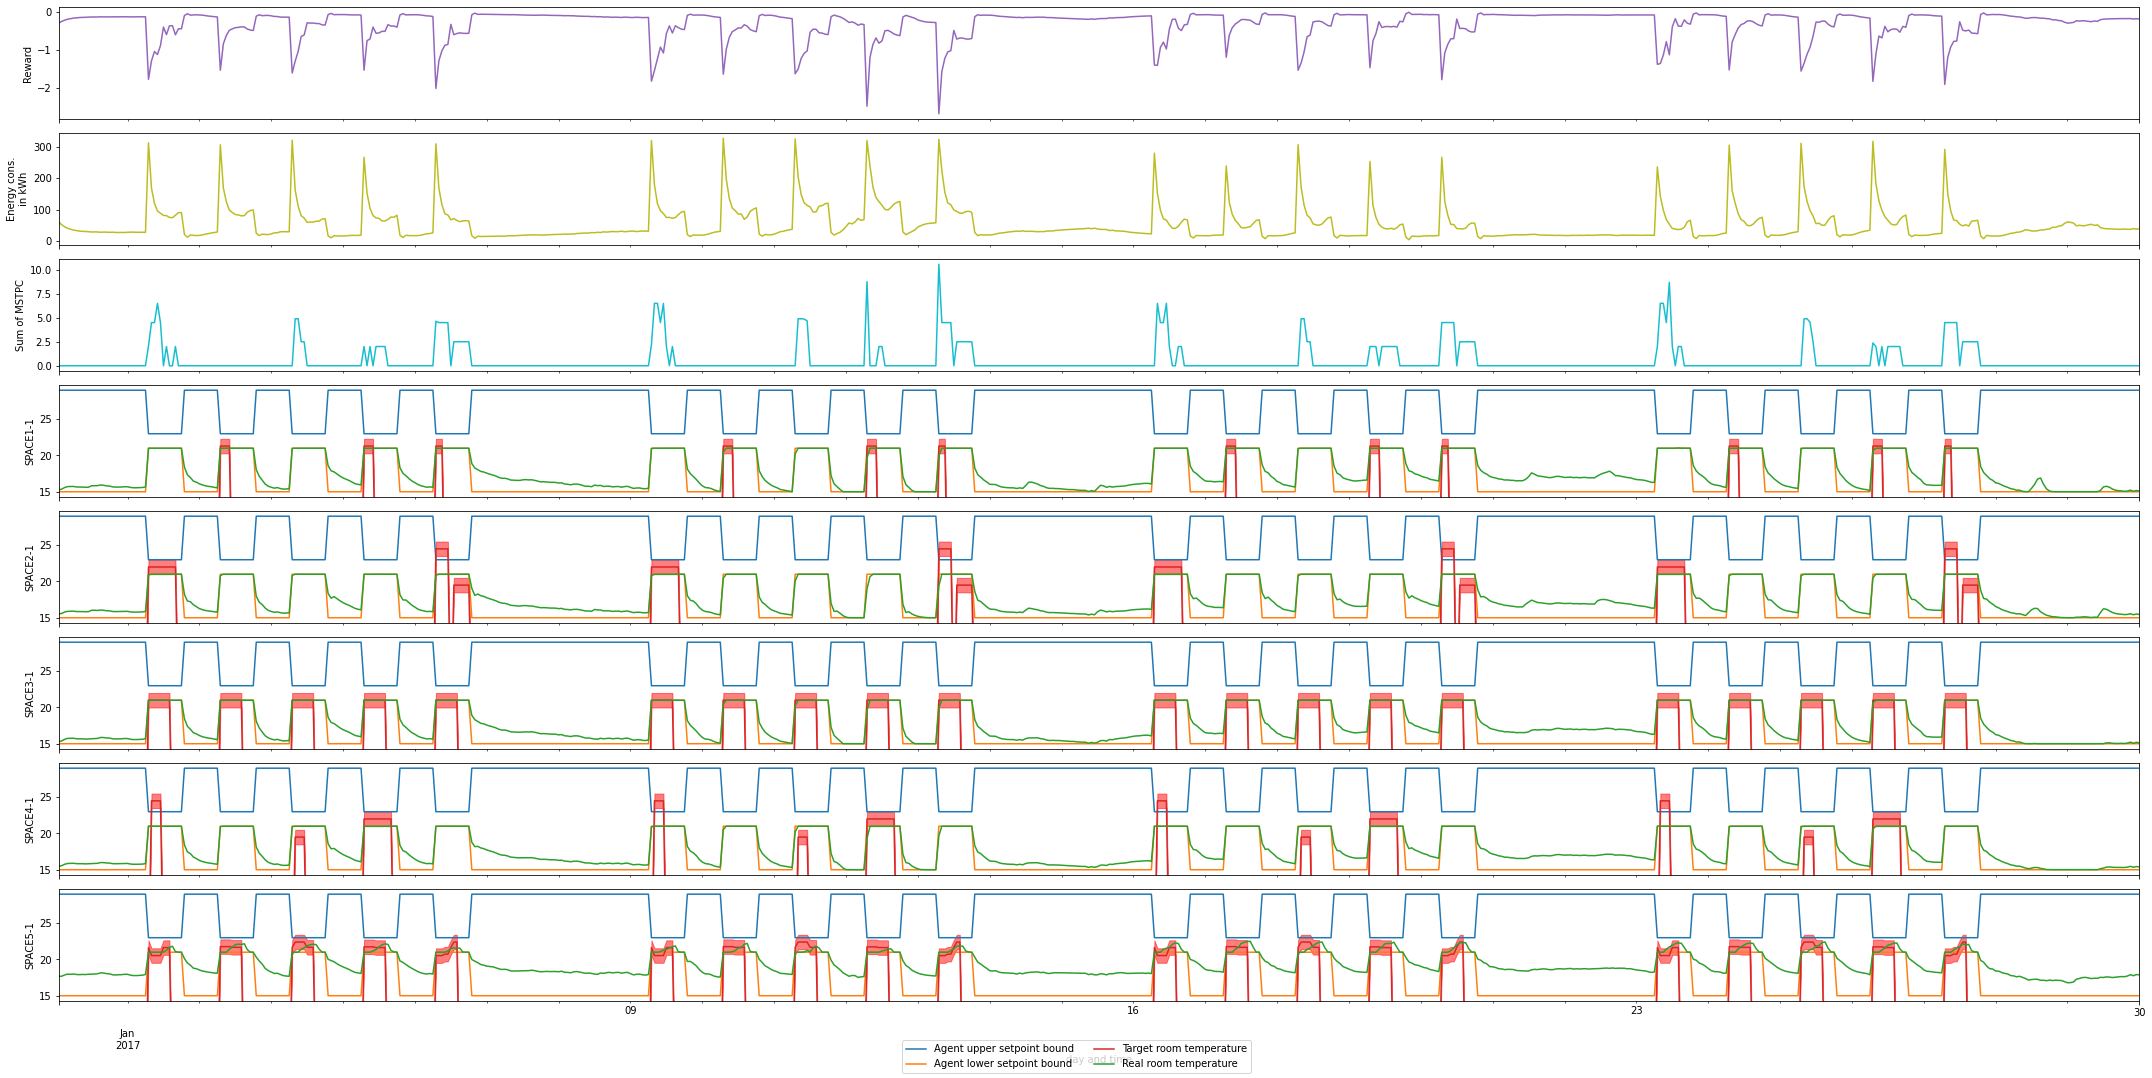

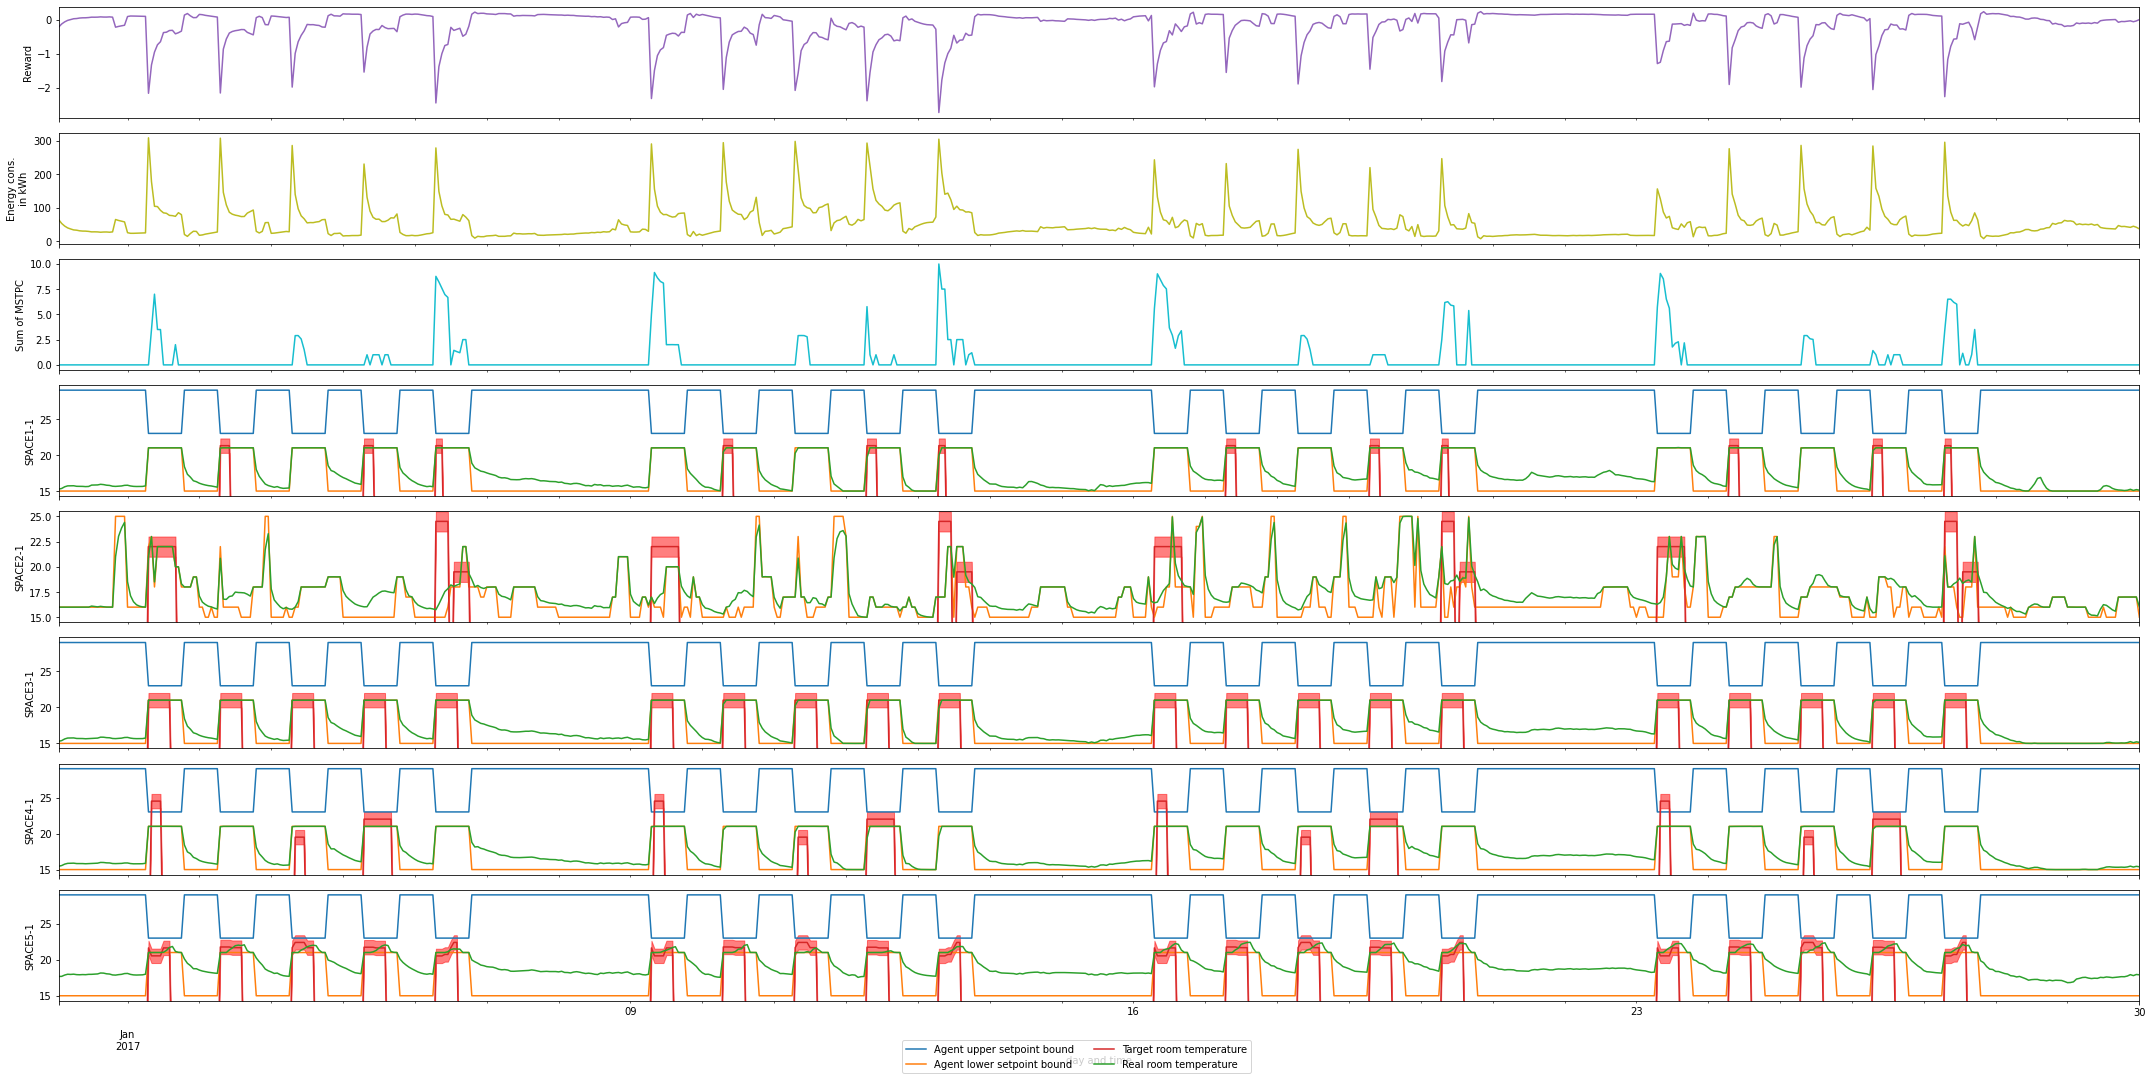

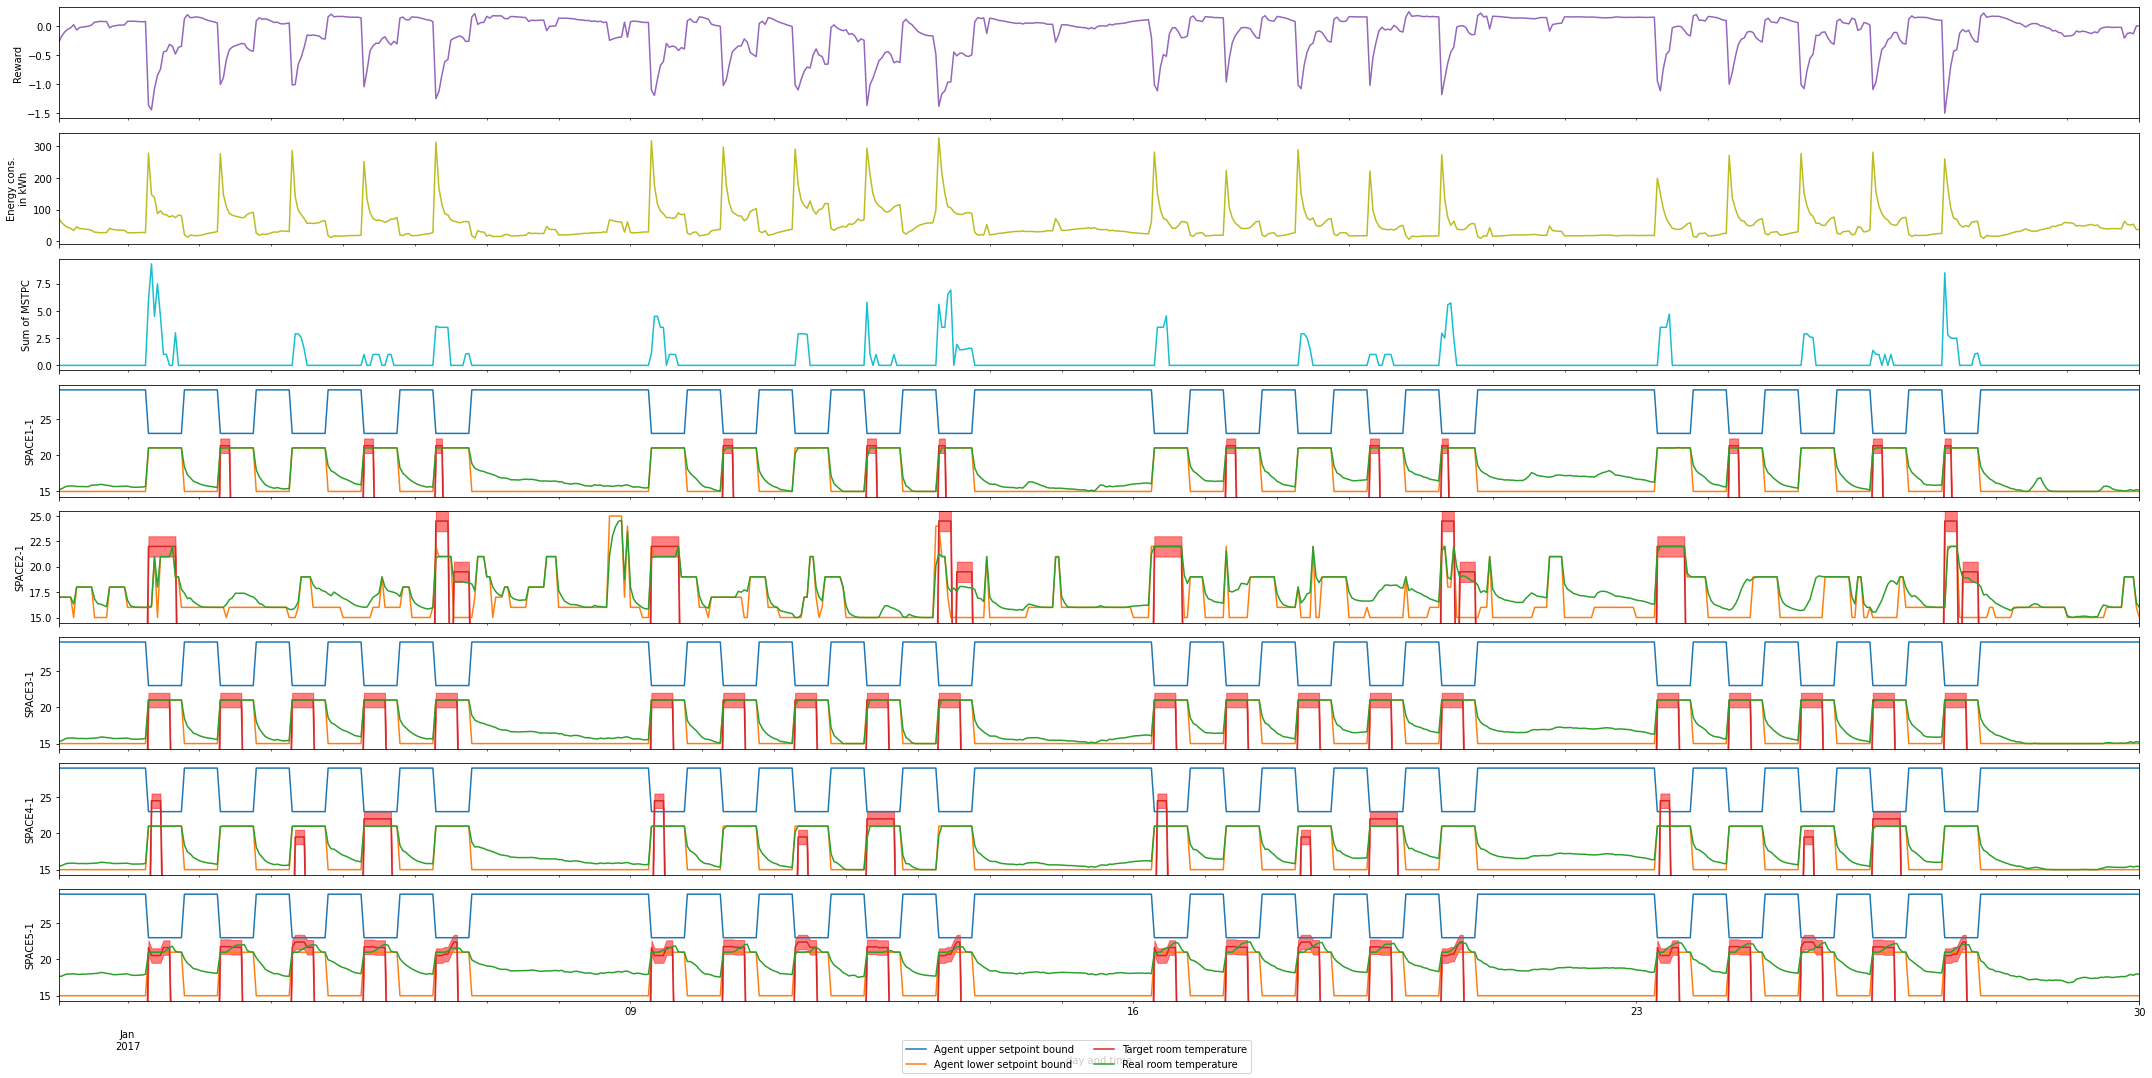

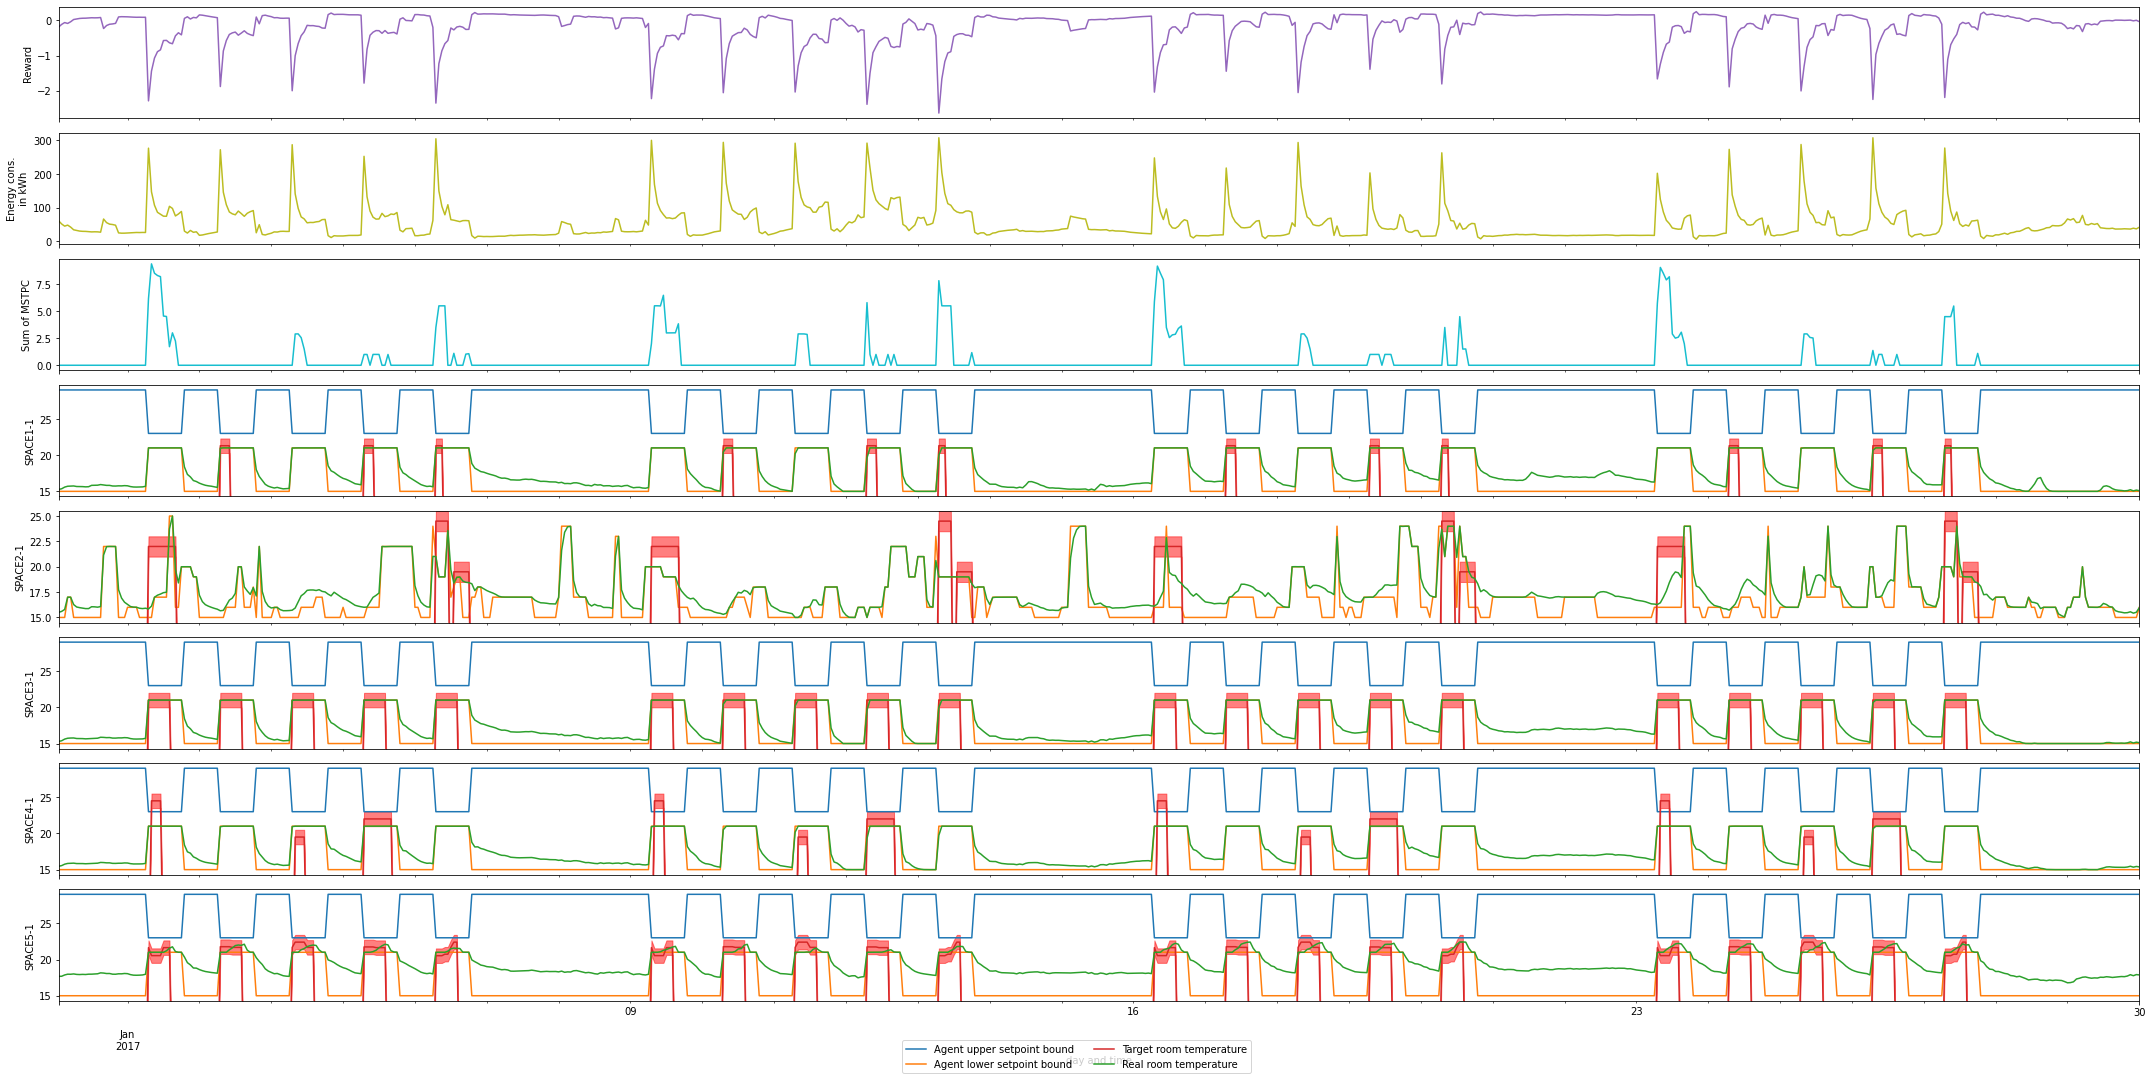

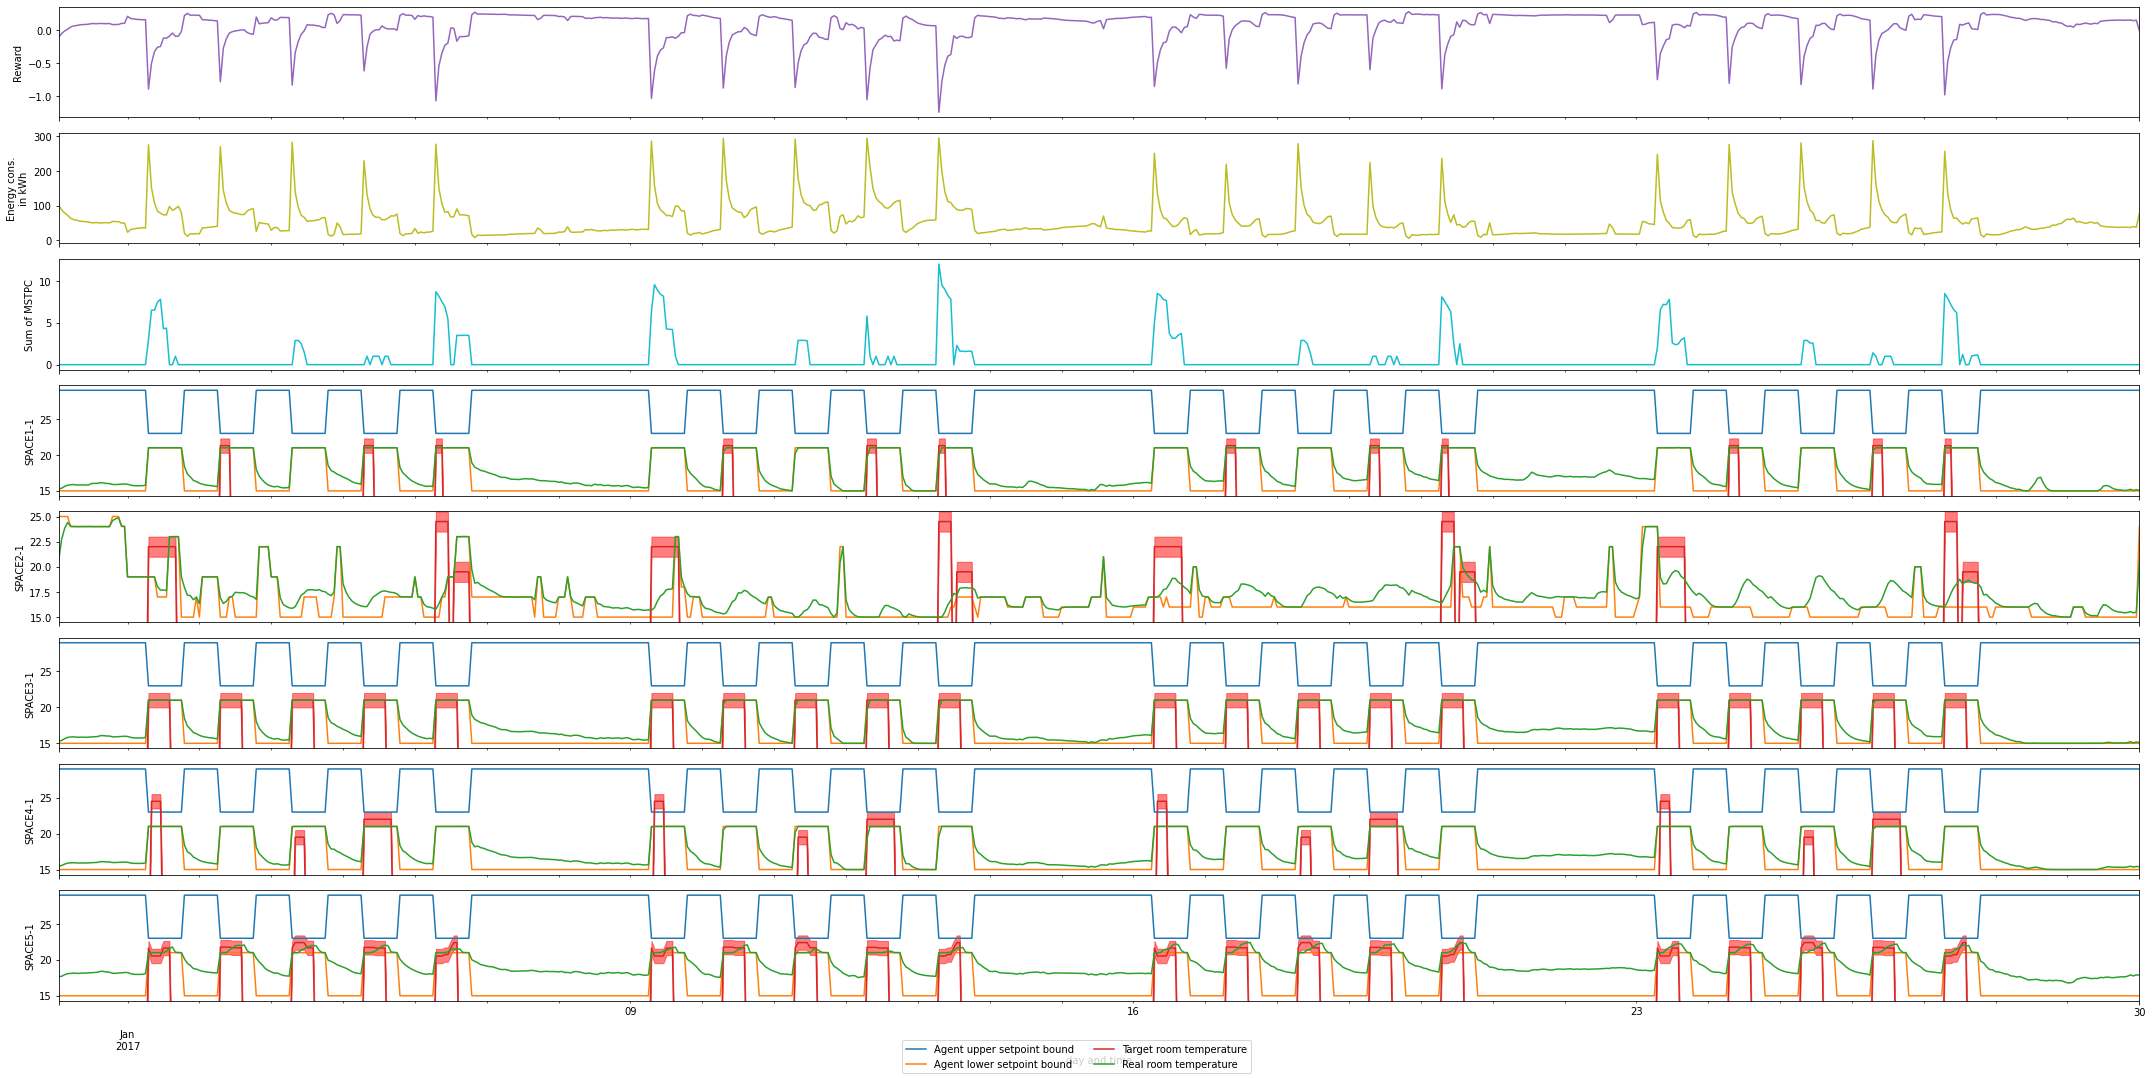

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 2: s321, agent 1
No q-values available for scenario 2: s321, agent 2
No q-values available for scenario 2: s321, agent 3
No q-values available for scenario 2: s321, agent 4


(<Figure size 2160x216 with 2 Axes>,
 [<AxesSubplot:ylabel='Scenario 2: s321\nAgent 0'>])

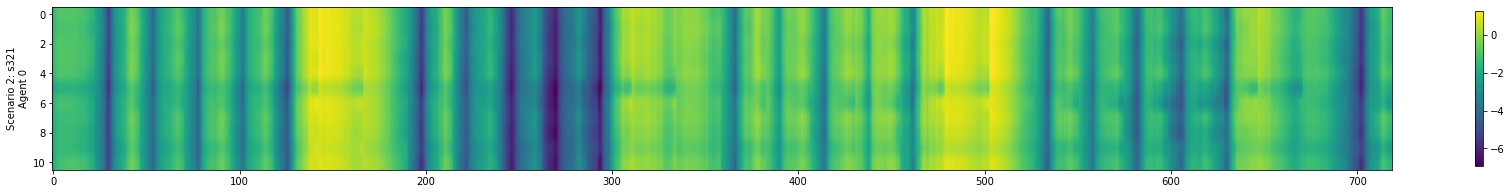

In [33]:
vh.plot_q_values(q_values, fig_width)